# Fancy Indexing:
* Pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values.
* When using arrays of indices, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed.
* With fancy indexing, the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

In [2]:
import numpy as np

rng = np.random.default_rng(seed=42)
rng

Generator(PCG64) at 0x209606B1380

In [3]:
x = rng.integers(100, size=10)
x

array([ 8, 77, 65, 43, 43, 85,  8, 69, 20,  9], dtype=int64)

In [4]:
#Access 3 different elements
[x[3], x[7], x[2]]

[43, 69, 65]

In [5]:
# Or this
ind = [3, 7, 4]
x[ind]

array([43, 69, 43], dtype=int64)

In [6]:
ind2 = np.array([[3, 7],
                 [4, 5]])
ind2

array([[3, 7],
       [4, 5]])

In [7]:
x[ind2]

array([[43, 69],
       [43, 85]], dtype=int64)

In [8]:
X = np.arange(12).reshape(3, 4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [14]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [15]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# A. Combined Indexing:

In [16]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [17]:
# Fancy + Simple Indexing:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [18]:
# Fancy indexing w/ masking:
mask = np.array([True, False, True, False])
X[row[:, np.newaxis], mask]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [23]:
np.int32(mask)

array([1, 0, 1, 0])

In [27]:
X[:, mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# B. Example: Selecting Random Points:
* One common use of fancy indexing is the selection of subsets of rows from a matrix

In [29]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [30]:
X

array([[ 1.15413459,  2.92470083],
       [ 0.29859958,  0.70269772],
       [ 0.45157879,  2.04206115],
       [-0.7438549 , -1.72435348],
       [-1.22034316, -2.44014054],
       [ 0.6527679 ,  1.9750541 ],
       [ 0.54972363,  2.277978  ],
       [ 0.11686929,  0.08205385],
       [ 0.16125055,  1.71256248],
       [ 0.30668059,  0.27677374],
       [ 0.12162307,  0.86979138],
       [-0.49557222, -0.74967862],
       [-1.21759976, -0.6214432 ],
       [ 0.57150532,  0.82528836],
       [ 0.51610285,  1.91271382],
       [-0.99942859, -2.5361699 ],
       [ 1.09171867,  1.74322999],
       [-0.88550042, -1.3332946 ],
       [-0.24712957, -1.31696608],
       [-0.25914282, -0.4993263 ],
       [-0.53552327, -0.34963984],
       [-0.46638432, -0.39110061],
       [-0.17307612, -0.10490214],
       [-0.02560488, -1.63902974],
       [ 0.47534152,  0.63844824],
       [ 0.69553855,  1.38136677],
       [-1.04980646, -3.47162583],
       [-0.25056617, -2.42644537],
       [ 0.24711052,

C:\Users\JCA\AppData\Local\Temp\ipykernel_14676\3555842872.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


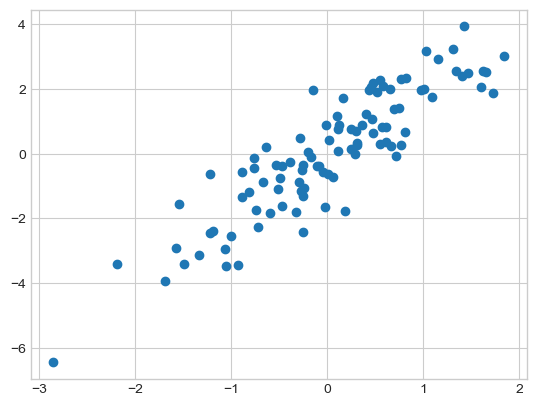

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(X[:, 0], X[:, 1])

In [32]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([40, 10, 38, 55, 42, 94, 45,  0, 50, 22,  4,  3, 53, 26, 33, 59, 41,
       17, 11, 15])

In [33]:
selection = X[indices]
selection.shape

(20, 2)

In [34]:
selection

array([[-0.27027141, -1.16057033],
       [ 0.12162307,  0.86979138],
       [ 0.75047452,  1.41883912],
       [ 0.40014615,  1.21788517],
       [-0.66717287, -0.89049014],
       [-0.92655043, -3.43514822],
       [ 1.84313282,  3.01803651],
       [ 1.15413459,  2.92470083],
       [ 0.55335726,  0.30762613],
       [-0.17307612, -0.10490214],
       [-1.22034316, -2.44014054],
       [-0.7438549 , -1.72435348],
       [ 0.00773229, -0.62443589],
       [-1.04980646, -3.47162583],
       [ 1.39888002,  2.38198713],
       [-1.57530882, -2.89921402],
       [-0.19551684,  0.04833702],
       [-0.88550042, -1.3332946 ],
       [-0.49557222, -0.74967862],
       [-0.99942859, -2.5361699 ]])

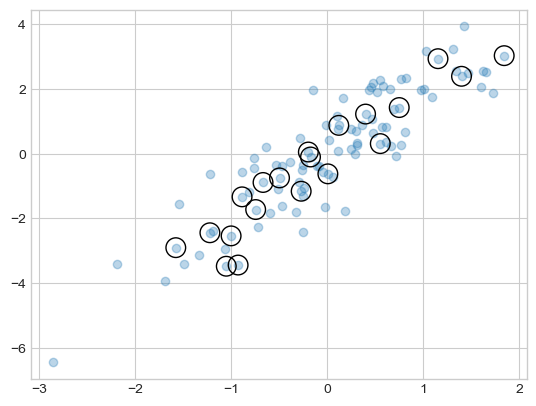

In [35]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolors='black', s=200);

# C. Modifying Values w/ Fancy Indexing:

In [37]:
x = np.arange(10)
i = np.array([2, 1, 8 ,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [38]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [39]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [42]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

# D. Example: Binning Data

In [44]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

# Compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [45]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [46]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [47]:
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
i

array([11, 11, 11,  8, 11,  7, 13,  8, 12,  8, 11, 10, 11,  9, 13,  9,  9,
        7, 11, 11, 13, 11,  8,  8, 11, 10, 13, 12, 10, 11,  7, 15, 10,  7,
       14,  8,  9, 11, 11,  9, 10, 13, 10,  7, 13, 11, 11, 13, 11, 11,  9,
        8, 12,  9,  8, 10, 11,  8, 11,  6,  8, 11,  8,  8, 11, 12, 11,  9,
       16, 11, 11, 10, 11, 11, 13, 10,  7,  8, 11, 11,  7,  9,  9, 11, 12,
        9, 11, 12, 14,  9, 11, 12, 10,  8, 10, 10,  9, 11,  8, 15],
      dtype=int64)

In [48]:
x

array([ 0.43874206,  0.32818515,  0.68328838, -0.81928256,  0.69156442,
       -1.62453268,  1.50806312, -1.22449846,  1.22696072, -1.05013046,
        0.62509363,  0.09693023,  0.62776415, -0.28565182,  1.49678665,
       -0.76768541, -0.3942867 , -1.35693505,  0.33524959,  0.57442768,
        1.62016911,  0.33395176, -1.02906713, -0.94266623,  0.38365532,
        0.25423793,  1.36108696,  1.25474959, -0.05637126,  0.44880896,
       -1.47909513,  2.40254455, -0.06959272, -1.52752832,  1.93633419,
       -1.28006351, -0.71562065,  0.72455605,  0.47362789, -0.33131697,
        0.26272942,  1.75038031,  0.01834221, -1.43899931,  1.3716487 ,
        0.67679557,  0.53793618,  1.53399445,  0.28214872,  0.56313954,
       -0.37793941, -1.15832253,  0.96594187, -0.35611958, -1.28536874,
        0.19742658,  0.41682623, -0.95386364,  0.75830441, -2.08596882,
       -1.16203473,  0.34232684, -1.11888193, -1.13596   ,  0.6742499 ,
        1.26767704,  0.65873509, -0.64003051,  3.09160717,  0.51

In [49]:
np.add.at(counts, i, 1)

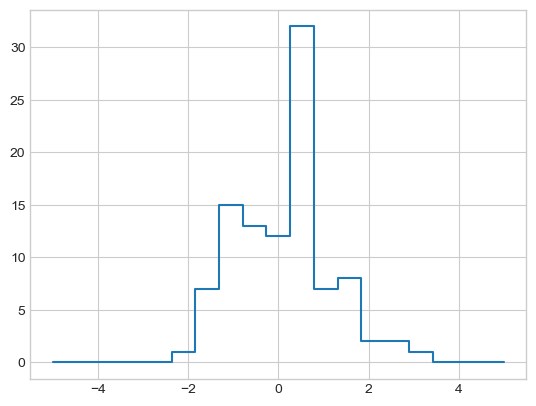

In [50]:
plt.plot(bins, counts, drawstyle='steps')

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,  8.,
         2.,  2.,  1.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x209627f7670>])

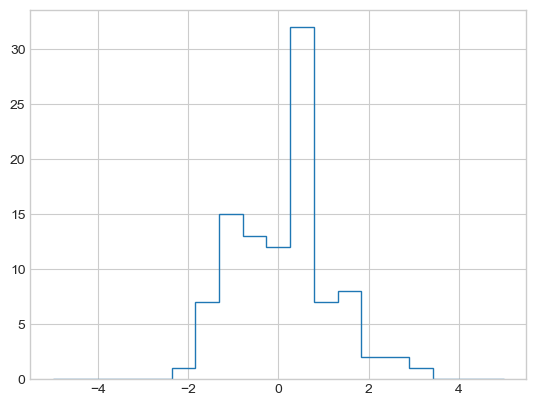

In [51]:
plt.hist(x, bins, histtype='step')